In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [155]:
titanic = pd.read_csv("titanic_train.csv")
# titanic.drop(titanic.columns[[6]], axis=1, inplace=True)
print(titanic.columns)

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Survived'],
      dtype='object')


In [179]:
titanic_parse = pd.DataFrame(range(5), columns=['Age'])
titanic.Fare = titanic.Fare.astype(int)
titanic.Age = titanic.Age.astype(int)
# titanic.Embarked = titanic.Embarked.astype(int)
titanic = titanic.fillna(0)

In [180]:
titanic.Embarked = titanic.Embarked.astype(int)

In [181]:
titanic.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,1,22,1,0,7,1,0
1,2,1,0,38,1,0,71,2,1
2,3,3,0,26,0,0,8,1,1
3,4,1,0,35,1,0,53,1,1
4,5,3,1,35,0,0,8,1,0


### The Titanic dataset consists of 891 records with each having 12 features

In [182]:
print("dimension of Titanic data: {}".format(titanic.shape))

dimension of Titanic data: (891, 9)


### Survived 0 means the individual died, outcome 1 means they survived
Of these 768 data points, 500 are labeled as 0 and 268 as 1:

In [183]:
print(titanic.groupby('Survived').size())

Survived
0    549
1    342
dtype: int64


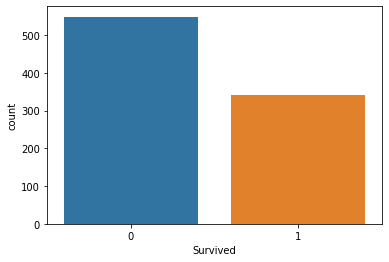

In [184]:
import seaborn as sns

sns.countplot(titanic['Survived'],label="Count")

In [185]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null int64
Embarked       891 non-null int64
Survived       891 non-null int64
dtypes: int64(9)
memory usage: 62.8 KB


### k-Nearest Neighbors
The k-NN algorithm is arguably the simplest machine learning algorithm. Building the model consists only of storing the training dataset. To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset—its “nearest neighbors.”

### Let’s investigate whether we can confirm the connection between model complexity and accuracy

In [186]:
np.any(np.isnan(titanic))

False

In [187]:
np.all(np.isfinite(titanic))

True

In [188]:
def clean_dataset(titanic):
    assert isinstance(titanic, pd.DataFrame), "df needs to be a pd.DataFrame"
#     clean_dataset(titanic).dropna(inplace=True)
    indices_to_keep = ~titanic.isin([np.nan, np.inf, -np.inf]).any(1)
    return titanic[indices_to_keep].astype(np.float64)

In [189]:
clean_dataset(titanic)
titanic.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,1,22,1,0,7,1,0
1,2,1,0,38,1,0,71,2,1
2,3,3,0,26,0,0,8,1,1
3,4,1,0,35,1,0,53,1,1
4,5,3,1,35,0,0,8,1,0


In [190]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(titanic.loc[:, titanic.columns != 'Survived'], titanic['Survived'], stratify=titanic['Survived'], random_state=66)


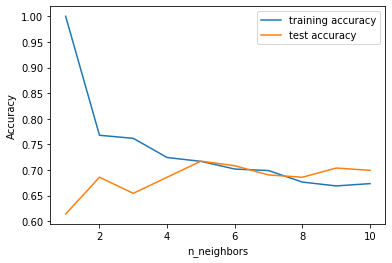

In [192]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [193]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.67
Accuracy of K-NN classifier on test set: 0.70


In [194]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter = 1000).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg.score(X_test, y_test)))

Training set accuracy: 0.790
Test set accuracy: 0.816


In [195]:
logreg001 = LogisticRegression(C=0.01, max_iter = 1000).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set accuracy: 0.710
Test set accuracy: 0.735


In [196]:
logreg100 = LogisticRegression(C=100, max_iter = 1000).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set accuracy: 0.789
Test set accuracy: 0.816
